# **Notes** 📔

> On using this code to run faster it is better to use GPU4 instead of CPU (Runtime Type) Or training the model will be very slow and might take hours


> On closing google coolab all the running history get deleted so if you want to run a piece of code it will give an error so it is better to use run all over again


> On downloading or writing any code can be written as a command in cmd/terminal/powerhell you need to include '!' before it to be recoginzed in juypter


# Prerequisites

## **To Download the needed Libaries Exceute the following Commands**

In [ ]:
!pip install -q keras

In [ ]:
!pip install opencv-python

In [ ]:
!pip install tensorflow-object-detection-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.2 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=cf645888dd06d81ce7b110e38d957874e77120daa6bd0dd42d955285b4ba029f
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [ ]:
!apt install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install opencv-python pillow tensorflow

## Loading Yolo files to be used in the code

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-11-04 19:55:40--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.9MB/s    in 12s     

2023-11-04 19:55:53 (19.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2023-11-04 19:55:54--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-11-04 19:55:54 (74.5 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
!ls

sample_data  yolov3.cfg  yolov3.weights


## Imageshow is disabled so google coolab offer another code

> The cv2.imshow() and cv.imshow() functions from the \opencv-python package are incompatible with Jupyter notebook;



In [ ]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  12292      0 --:--:-- --:--:-- --:--:-- 12287


## **Connecting to The Google drive to get The dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading and Downloading datasset to work with

[Garabage Clssification Dataset](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification/data)


---


[Garabage Dataset Bigger one](https://github.com/PROG-MohamedDwidar/garbage_cnn/tree/main/GarbageData)

## **Uploading Dataset on Google drive to access it**

In [ ]:
#dataset = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
dataset = '/content/drive/MyDrive/GarbageData'

## **Loading Libraries**

In [ ]:
import cv2
import numpy as np
#On importing functions from library Tensorflow it is better to write it in the code itself not import it and use it then
import tensorflow as tf # We use tf alias on using tensorflow library
from tensorflow import keras
import random
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
from pycocotools.coco import COCO
from IPython.display import Image
from PIL import Image
import requests
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Training model using YOLO

Training a YOLO (You Only Look Once) model involves several steps. YOLO is a powerful object detection algorithm, and to train it, you'll need labeled data, the YOLO model configuration, and some knowledge of deep learning frameworks like Darknet or YOLOv4.

Here are the general steps for training a YOLO model:

1. **Collect and Annotate Your Dataset**:
   - Gather a dataset that contains images of the objects you want to detect.
   - Annotate the images with bounding boxes that specify the location of each object.
   - You can use tools like LabelImg, RectLabel, or custom scripts for annotation.

2. **Prepare Label Files**:
   - Create label files that describe the objects in your images.
   - YOLO label files typically follow the format: `<class_id> <center_x> <center_y> <width> <height>`.
   - Each line corresponds to a single object in an image.

3. **Download YOLO Pre-trained Weights and Configurations**:
   - Download pre-trained YOLO model weights and configuration files (e.g., YOLOv3, YOLOv4) from the official YOLO website or repository.

4. **Customize YOLO Configuration**:
   - Modify the YOLO model configuration file to suit your dataset and preferences.
   - Adjust parameters such as the number of classes, anchors, and input resolution.

5. **Train the Model**:
   - Use the `darknet` framework (or a compatible YOLO training framework) to train the model.
   - Train the model on your dataset using the custom YOLO configuration.
   - Use the annotated images and label files.

6. **Evaluate Model Performance**:
   - After training, evaluate the model's performance on a validation dataset.
   - Check metrics like mAP (mean average precision) to assess detection accuracy.

7. **Fine-tune and Iterate**:
   - Fine-tune the model and the training parameters to improve performance.
   - Iterate on the training process by adjusting parameters and annotating more data if necessary.

8. **Save the Trained Model**:
   - Once the model performs well, save the trained weights and configuration for later use.

9. **Test the Model**:
   - Use the trained model to perform object detection on new, unseen images to ensure it works as expected.

10. **Deployment**:
    - Deploy the model for your specific application, whether it's for real-time object detection or batch processing.

The training process can be complex and may require substantial computational resources. It's essential to refer to official YOLO documentation and tutorials for detailed instructions specific to your YOLO version (e.g., YOLOv3, YOLOv4).

Keep in mind that training a YOLO model can be resource-intensive and time-consuming, especially for large datasets and high-resolution images. Additionally, it may require a strong GPU or access to cloud computing resources.

In [ ]:
# Load the pre-trained YOLOv3 weights and configuration
yolo_weights = 'yolov3.weights'
yolo_config = 'yolov3.cfg'
yolo_classes = '/content/drive/MyDrive/yolov3.txt' #Upload the file on Github please

# Load the class labels
#The code opens the yolo_classes file and reads its content,
# splitting it into lines to obtain the class names.
#The class names will be used to identify objects detected by the YOLO model.
with open(yolo_classes, 'r') as f:
    class_names = f.read().splitlines()

    # Load the YOLO model
net = cv2.dnn.readNetFromDarknet(yolo_config, yolo_weights)

# Set backend and target to use GPU
#The code sets the YOLO model's backend and target to utilize the GPU for faster processing.
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

# Set the input image size
input_size = (224, 224)

# Get the list of all images in the Kaggle database
image_paths = []
for root, dirs, files in os.walk('/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'):
    for file in files:
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))

# Iterate over all the images in the database
#The code iterates through a directory structure, searching for '.jpg' files.
#The paths of these image files are stored in the image_paths list.
for image_path in image_paths:

    # Load and preprocess the image
   # For each image, it loads and preprocesses the image using OpenCV's cv2.imread and cv2.dnn.blobFromImage functions.
#The image is converted into a blob, which is a suitable format for neural network input.
#The input blob is set for the YOLO network using net.setInput(blob).
    image = cv2.imread(image_path)
    blob = cv2.dnn.blobFromImage(image, 1/255.0, input_size, swapRB=True, crop=False)
# Set the input blob for the network
net.setInput(blob)

# Forward pass through the network
#It retrieves the output layers and stores them in the outputs variable.
layer_names = net.getLayerNames()
unconnected_out_layer_index = net.getUnconnectedOutLayers()

if isinstance(unconnected_out_layer_index, int):
    output_layers = layer_names[unconnected_out_layer_index]
else:
    output_layers = [layer_names[i - 1] for i in unconnected_out_layer_index]

outputs = net.forward(output_layers)


# Process the outputs
#The code processes the network's outputs to identify objects.
#It calculates the class IDs, confidences, and bounding box coordinates for detected objects.
#Objects with confidence greater than 0.5 are considered valid.
class_ids = []
confidences = []
boxes = []

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            width = int(detection[2] * image.shape[1])
            height = int(detection[3] * image.shape[0])


            # Calculate the top-left corner coordinates of the bounding box
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, width, height])

# Apply non-maximum suppression to remove redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

# **Training the model using TensorFlow**

## **Tutorial For tensorflow**

*   [TensorFlow](https://www.youtube.com/watch?v=CMu25mtyl-s)
*   [Train Neural Network](https://www.youtube.com/watch?v=uqomO_BZ44g)




## Tensorflow
[TensorFlow For Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb)
*VERY IMP NOTE ON DOWNLOADING TENSORFLOW ON YOUR LOCAL COMPUTER BE CAREFUL ABOUT USING PIP TO INSTALL IT AND MAKE SURE VERSIONS OF PYTHON TENSORFLOW AND PIP ARE RIGHT OTHERWISE IT WON'T BE RECOGNIZED BY THE COMPUTER / OR DOWNLOAD IT MANUALLY FOLLOWING A TUTORIAL/ OR USE IT ON GOOGLE COLAB IT MAINTAINS THESE ERRORS*
1. **Collect a dataset of images of garbage, labeled with the type of garbage.** You can either collect this dataset yourself or use a pre-existing dataset. Some pre-existing datasets that you can use include:
    - TrashNet
    - RecycleNet
    - Google AI CircularNet dataset
2. **Split the dataset into training and test sets.** The training set will be used to train the model, and the test set will be used to evaluate the performance of the model on unseen data. A common split is to use 80% of the dataset for training and 20% of the dataset for testing.
3. **Preprocess the images.** This may involve resizing the images to a consistent size, normalizing the pixel values, and/or cropping the images to focus on the garbage item.
4. **Choose a model architecture.** There are a number of different TensorFlow model architectures that you can use for garbage classification. Some popular choices include:
    - ResNet
    - MobileNet
    - EfficientNet
    - VGG16
5. **Compile the model.** This involves specifying the loss function, optimizer, and learning rate.
6. **Train the model.** This involves feeding the training images to the model and updating the model parameters to minimize the loss function.
7. **Evaluate the model.** This involves feeding the test images to the model and measuring the accuracy of the model's predictions.
8. **Save the model.** Once you are satisfied with the performance of the model, you can save it to a file. This will allow you to load the model later and use it to classify new images of garbage.

In [ ]:
# Load the pre-trained MobileNetV2 model
#This model is used for image classification.
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), weights='imagenet')

# Reshape the output of the base model to 4D
# necessary for the subsequent layers in the model.
base_model_output = tf.reshape(base_model.output, [-1, 1, 1, 1000])

# Create a data loader for the training and validation data
#suitable for image classification tasks. It rescales the pixel values in the images to a range between 0 and 1.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    dataset,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False

)

# Add a global average pooling layer
#used to transition from a convolutional feature map to a fully connected layer.
x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)

# Add a dense layer with 6 outputs, corresponding to the 6 garbage classes
#the model is trained to distinguish between two classes.
# This layer will be responsible for producing classification probabilities.


x = tf.keras.layers.Dense(6, activation='softmax')(x)

# Create the model

model = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile the model
#The binary cross-entropy loss is suitable for binary classification tasks.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#This is where the model learns from the training data.
model.fit(train_generator, epochs=20)

# Evaluate the model
#The model's performance is evaluated on the validation dataset,
#and the validation loss and accuracy are computed.
val_loss, val_accuracy = model.evaluate(val_generator)

# Save the model
model.save('garbage_model.h5')

# Load the trained TensorFlow model
model = tf.keras.models.load_model('garbage_model.h5')


# Print the validation accuracy
print('Validation accuracy:', val_accuracy)

14536120/14536120 [==============================] - 0s 0us/step
Found 4580 images belonging to 6 classes.
Found 4580 images belonging to 6 classes.
Epoch 1/20
144/144 [==============================] - 1109s 7s/step - loss: 1.5859 - accuracy: 0.7653
Epoch 2/20
144/144 [==============================] - 36s 250ms/step - loss: 1.3445 - accuracy: 0.7373
Epoch 3/20
144/144 [==============================] - 35s 244ms/step - loss: 1.1886 - accuracy: 0.7251
Epoch 4/20
144/144 [==============================] - 35s 239ms/step - loss: 1.0428 - accuracy: 0.7620
Epoch 5/20
144/144 [==============================] - 34s 239ms/step - loss: 1.0010 - accuracy: 0.7157
Epoch 6/20
144/144 [==============================] - 35s 239ms/step - loss: 1.0878 - accuracy: 0.5959
Epoch 7/20
144/144 [==============================] - 34s 235ms/step - loss: 0.8794 - accuracy: 0.7548
Epoch 8/20
144/144 [==============================] - 35s 242ms/step - loss: 0.8072 - accuracy: 0.7832
Epoch 9/20
144/144 [========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation accuracy: 0.710917055606842


In [ ]:
print("One-hot encoded labels for the first batch:")
for batch in train_generator:
    print(batch[1])
    break

One-hot encoded labels for the first batch:
[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


## **Capturing image from webcam to be classified to the By the trained model**


---

# Code that is taken from google coolab as we are working on cloud not local computer


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


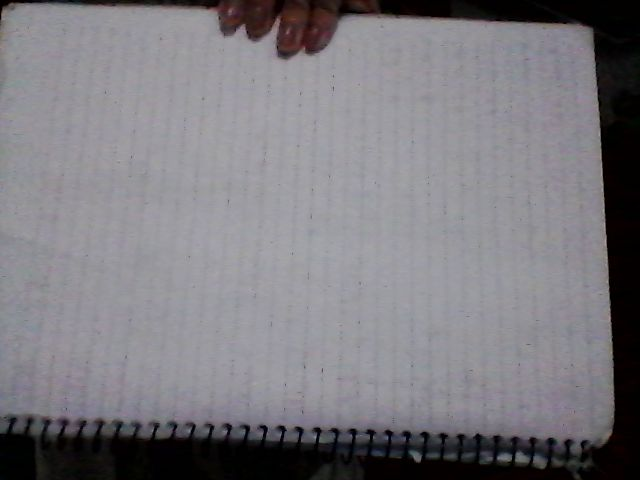

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Classifing Models

*   tf.io.read_file: Reads the image file.
*   tf.image.decode_image: Decodes the image with 3 color channels (RGB).

*   tf.image.resize: Resizes the image to match the input size expected by your model (in this case, 224x224 pixels).
*  img = img / 255.0: Normalizes the pixel values to be in the range [0, 1], which is often required when using pre-trained models.


---

*   img_array is a NumPy array with the processed image, and you expand its dimensions to match the shape expected by the model (batch size of 1).

*   model.predict generates predictions for the provided image.




1/1 [==============================] - 1s 748ms/step
Predicted class: paper


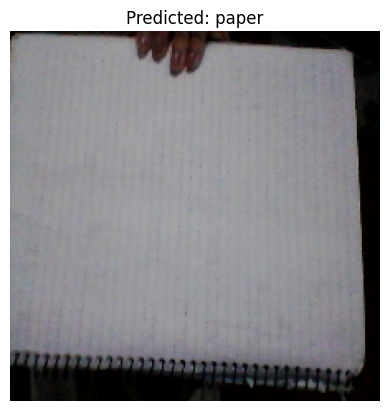

In [ ]:
model = tf.keras.models.load_model('garbage_model.h5')

#img_path = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification/photo.jpg'  # Change to your image file path
img_path = '/content/photo.jpg'
img = tf.io.read_file(img_path)
img = tf.image.decode_image(img, channels=3)
img = tf.image.resize(img, (224, 224))  # Adjust target size as per your model
img = img / 255.0  # Normalize the image data if necessary (match preprocessing during training)

img_array = np.expand_dims(img, axis=0)

predictions = model.predict(img_array)

class_names = ["cardboard", "glass", "metal", "paper","plastic" , "trash"]  # Replace with your class labels
predicted_class = np.argmax(predictions[0])
predicted_label = class_names[predicted_class]
print(f"Predicted class: {predicted_label}")

plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()


# Upload to Github


---



In [ ]:
!git clone https://github.com/SJa-638/test-robot.git

In [ ]:
!git config --global user.name "SJa-638"
!git config --global user.email "sazab638@gmail.com"


In [ ]:
!git config --global --list

In [ ]:
# Navigate to the cloned repository directory
%cd '/content/test-robot'

# Upload the notebook to the cloned repository
!git add .
!git commit -m "Add notebook"

# Push the changes to the remote repository
!git push

# References ✍ 📄


1.   https://www.sciencedirect.com/science/article/pii/S0956053X23001915
2.   




# **Thank You** 💻 😃


# **Draft** 🔽


---




In [ ]:
!pip install kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
!sudo chown root:root ~/.kaggle
!sudo chown root:root ~/.kaggle/kaggle.json

In [ ]:
!sudo chmod 600 ~/.kaggle
!sudo chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Load the pre-trained object detection model
model = tf.keras.models.load_model('garbage_model.h5')

# Load the image
image = tf.io.read_file("/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification/photo.jpg")
image = tf.image.decode_jpeg(image)

# Preprocess the image
image = tf.image.resize(image, (224, 224))
image = image / 255.0
image = tf.expand_dims(image, 0)

# Detect objects in the image
#detections = model.predict(image)  # Use predict instead of model(image)

# Get the bounding boxes of the detected objects
#boxes = detections[0]  # Use index 0 to get the first batch of detections

# Convert TensorFlow tensors to NumPy arrays for easier processing
#boxes = boxes.numpy()
#image_with_boxes = cv2.cvtColor(image[0].numpy(), cv2.COLOR_RGB2BGR)

# Draw bounding boxes around the detected objects
#image_with_boxes = cv2.cvtColor(image[0].numpy(), cv2.COLOR_RGB2BGR)  # Convert image to BGR format for OpenCV
# Detect objects in the image
#detections = model.predict(tf.convert_to_tensor(image)[tf.newaxis, ...])

# Perform object detection
detections = model(image)

# Draw bounding boxes around the detected objects
for detection in detections['detection_boxes'][0]:
    ymin, xmin, ymax, xmax = detection
    h, w, _ = image.shape
    x, y, w, h = int(xmin * w), int(ymin * h), int((xmax - xmin) * w), int((ymax - ymin) * h)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
cv2.imshow('Image with Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Load the pre-trained model
model = tf.keras.models.load_model('garbage_model.h5')

# Preprocess the input image
image = tf.io.read_file("/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification/photo.jpg")
image = tf.image.decode_jpeg(image, channels=3)
image = tf.expand_dims(image, 0)
image = tf.image.resize(image, (224, 224))
image = image / 255.0

# Feed the preprocessed input to the model
predictions = model.predict(image)
'''
# Postprocess the output of the model
boxes = detections['detection_boxes']
classes = detections['detection_classes']
scores = detections['detection_scores']
'''
# Filter out detections that are below a certain confidence threshold
confidence_threshold = 0.5
filtered_predictions = [pred for pred in predictions[0] if pred[4] > confidence_threshold]

# Extract the bounding box coordinates and class labels
boxes = []
class_ids = []
confidences = []

for pred in filtered_predictions:
    x, y, w, h = pred[:4] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
    confidence = pred[4]
    class_id = np.argmax(pred[5:])

    boxes.append((int(x), int(y), int(w), int(h)))
    class_ids.append(class_id)
    confidences.append(float(confidence))

# Perform non-maximum suppression to eliminate overlapping boxes
nms_threshold = 0.3
indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)

# Draw the bounding boxes and labels on the image
for i in indices:
    i = i[0]
    x, y, w, h = boxes[i]
    #label = class_labels[class_ids[i]]
    confidence = confidences[i]

    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f'{label}: {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the annotated image
cv2.imshow('Object Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Draw the bounding boxes on the image

plt.imshow(image[0])

for box, class_name, score in zip(boxes, classes, scores):
    plt.rectangle((box[1], box[0]), (box[3], box[2]), color='red')
    plt.text((box[1], box[0]), class_name + ': ' + str(score), color='white')

plt.show()

In [ ]:


# Load the dataset
(dataset, info) = tfds.load(dataset_name, split='train', with_info=True)

# Access the class names
class_names = info.features['label'].names
print(class_names)


In [ ]:
import kaggle
#Set up the Kaggle API
api = KaggleApi()
api.authenticate()

#Path to the downloaded dataset
dataset_path = 'D:\Kaggle dataset archive.zip'  # Path to the extracted dataset files

#Download the Kaggle dataset
dataset_name = 'lkihjh777'  # Replace with the name of the Kaggle dataset you want to download
#api.dataset_download_files(dataset_name, path=dataset_path, unzip=True)

#Iterate over the downloaded images
for file_name in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, file_name)

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Perform image processing operations on the image as needed
    # Example: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Example: Apply a threshold to create a binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Perform further processing or analysis on the image

    # Display the processed image
    cv2.imshow('Processed Image', binary_image)
    cv2.waitKey(0)

    # Clean up resources
    cv2.destroyAllWindows()

In [ ]:
# Capture an image from the webcam
#cap = cv2.VideoCapture(0)
#ret, frame = cap.read()


In [ ]:
# Preprocess the image
#image = cv2.resize(frame, (224, 224))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image = np.expand_dims(image, axis=0)

# Classify the image using the trained model
prediction = model.predict('photo.jpg')
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Release the webcam
cap.release()

In [ ]:
   '''
def take_photo():
  """Takes a photo using the webcam and saves it to a file.

  Returns:
    The filename of the saved photo.
  """

  cap = cv2.VideoCapture(0)
  ret, frame = cap.read()
  if ret:
    filename = 'photo.jpg'
    cv2.imwrite(filename, frame)
    return filename
  else:
    raise Exception('Could not take photo.')
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  '''

In [ ]:
# Create a virtual webcam using ManyCam.
url = 'https://api.manycam.com/v1/webcams'
response = requests.post(url, json={'name': 'Virtual Webcam'})
webcam_id = response.json()['id']

# Capture a frame from the virtual webcam.
cap = cv2.VideoCapture(webcam_id)
ret, frame = cap.read()

# Save the frame to a file.
filename = 'photo.jpg'
cv2.imwrite(filename, frame)

# Display the image.
image = cv2.imread(filename)
cv2.imshow('Image', image)
cv2.waitKey(0)

In [ ]:
# Modify the path to the path of dataset in your own Drive
dataset = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
trainGarabge = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
valdData = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'

# Navigate to the directory where the dataset is uploaded
os.chdir(trainGarabge)
os.chdir(valdData)

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset)
# Load the dataset into Keras
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    trainGarabge,
    seed=123,
    validation_split=0.2,
    subset="training",
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valdData,
    validation_split=0.2,
    subset="validation",
    seed=123,
)

===================================================================
size = (512,512)
#TO be Rewritten
ds_train = trainGarabge.map(lambda image, label: (tf.image.resize(image, size), label))
#ds_train = trainGarabge.map(lambda image, label:(tf.image.resize(image,size),label)
ds_vald = valdData.map(lambda image, label:( tf.image.resize(image,size),label ))


In [ ]:
# Create the model
model = tf.keras.Sequential()


# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(tf.keras.layers.Flatten())

# Add dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

